In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

### Cargar datos

In [4]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Tamaño del Dataset

In [5]:
df.shape

(41188, 21)

### Identificación del tipo de datos

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [30]:
df['poutcome'].value_counts() / df.shape[0]

poutcome
nonexistent    0.863431
failure        0.103234
success        0.033335
Name: count, dtype: float64

In [29]:
df['day_of_week'].value_counts() / df.shape[0]

day_of_week
thu    0.209357
mon    0.206711
wed    0.197485
tue    0.196416
fri    0.190031
Name: count, dtype: float64

In [28]:
df['month'].value_counts() / df.shape[0]

month
may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: count, dtype: float64

In [26]:
df['loan'].value_counts() / df.shape[0]

loan
no         0.824269
yes        0.151695
unknown    0.024036
Name: count, dtype: float64

In [25]:
df['housing'].value_counts() / df.shape[0]

housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: count, dtype: float64

In [27]:
df['contact'].value_counts() / df.shape[0]

contact
cellular     0.634748
telephone    0.365252
Name: count, dtype: float64

## Columnas a eliminar

In [23]:
df['default'].value_counts() / df.shape[0]

default
no         0.791201
unknown    0.208726
yes        0.000073
Name: count, dtype: float64

#### Columna default

Variable categórica que toma valor no = 79% si < 1% y desconocido = 20%.

Esta variable no aporta valor y es candidata a eliminación.

In [35]:
df = df.drop(columns=['default'])
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Identificación y conteo de valores nulos

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [18]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

### Estadistica

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


analizar outliers
realizar split
hacer scaling y encoding
luego modelar. todo debe estar numerico

### Visualización

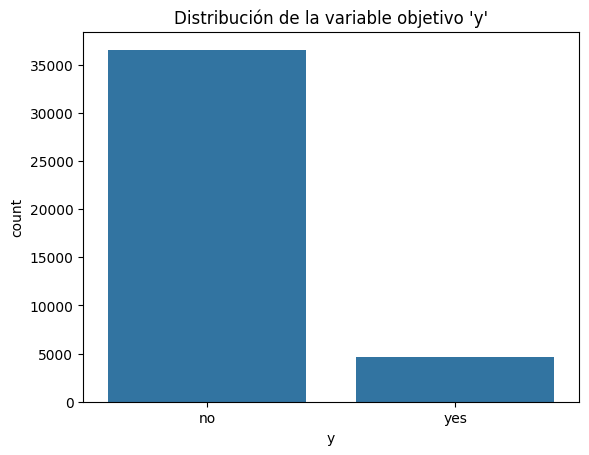

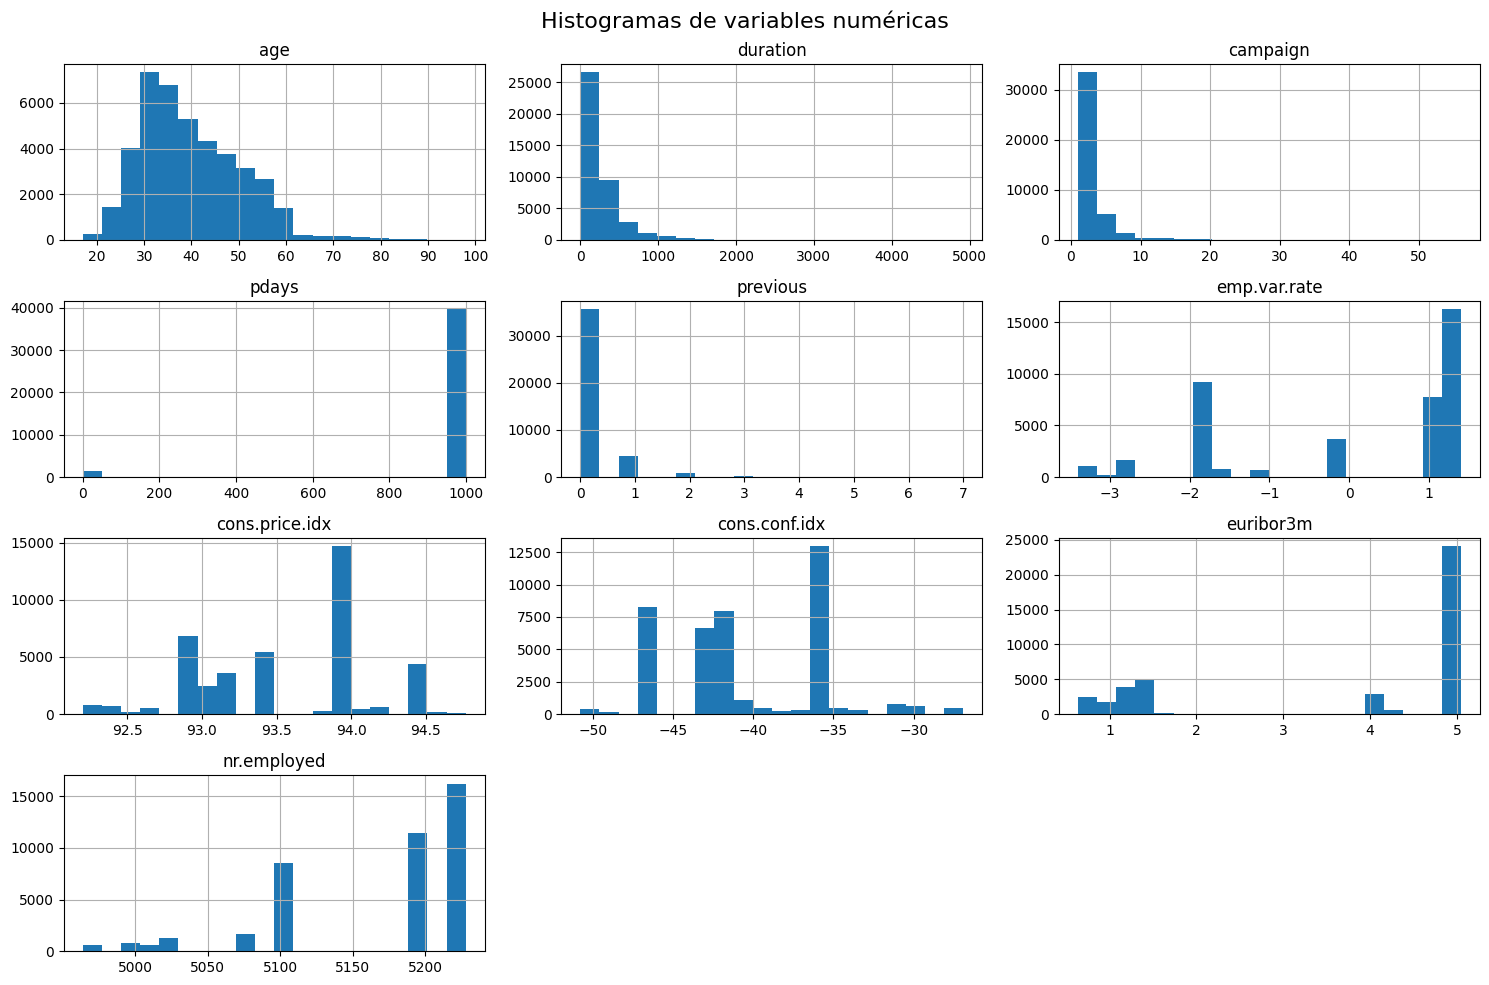

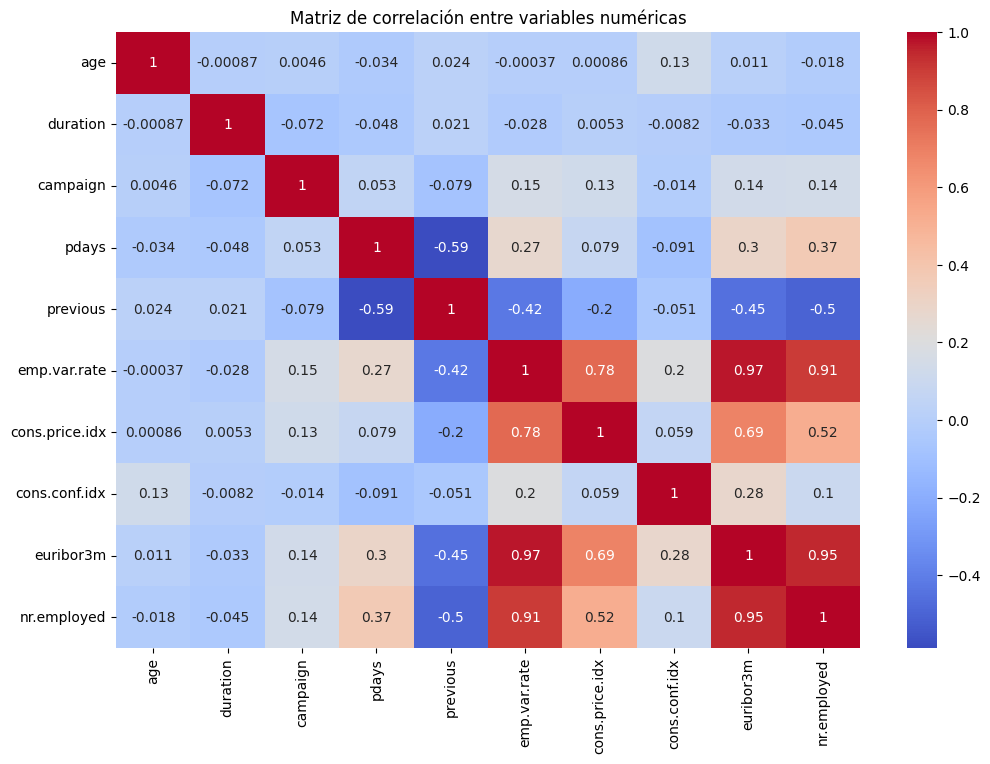

In [11]:

sns.countplot(data=df, x='y')
plt.title("Distribución de la variable objetivo 'y'")
plt.show()
df.select_dtypes(include='number').hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


### Regresión logística

In [12]:
df_model = df.copy()

### Convertir variable objetivo a binaria

In [ ]:
df_model['y'] = df_model['y'].map({'yes': 1, 'no': 0})

##### Verificamos si la conversión fue exitosa

In [ ]:
print(df_model['y'].unique())

In [ ]:

# Aplicar one-hot encoding a las variables categóricas (excepto 'y')
df_model = pd.get_dummies(df_model, drop_first=True)

In [ ]:
# Verificamos si 'y' todavía está presente
'y' in df_model.columns

In [ ]:
# Separar variables predictoras y objetivo
X = df_model.drop('y', axis=1)
y = df_model['y']

In [ ]:

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


In [ ]:

# Predicciones y evaluación
y_pred = model.predict(X_test_scaled)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))